# Plotting the Performance Test Results

We use this notebook to plot the results of the [performance_profiling](https://github.com/iloudaros/LoudVA/blob/main/ansible/performance_profiling.yaml) play, that collects results for different Jetson Configurations.


In [1]:
import ihelper as i

device = 'xavier-nx-00'
measurement_code = 'Representative'
measurement_dir = f'/home/louduser/LoudVA/measurements/archive/{measurement_code}/{device}/measurements'

## Plotting the results of the GPU Frequency Test

### Inferences per second

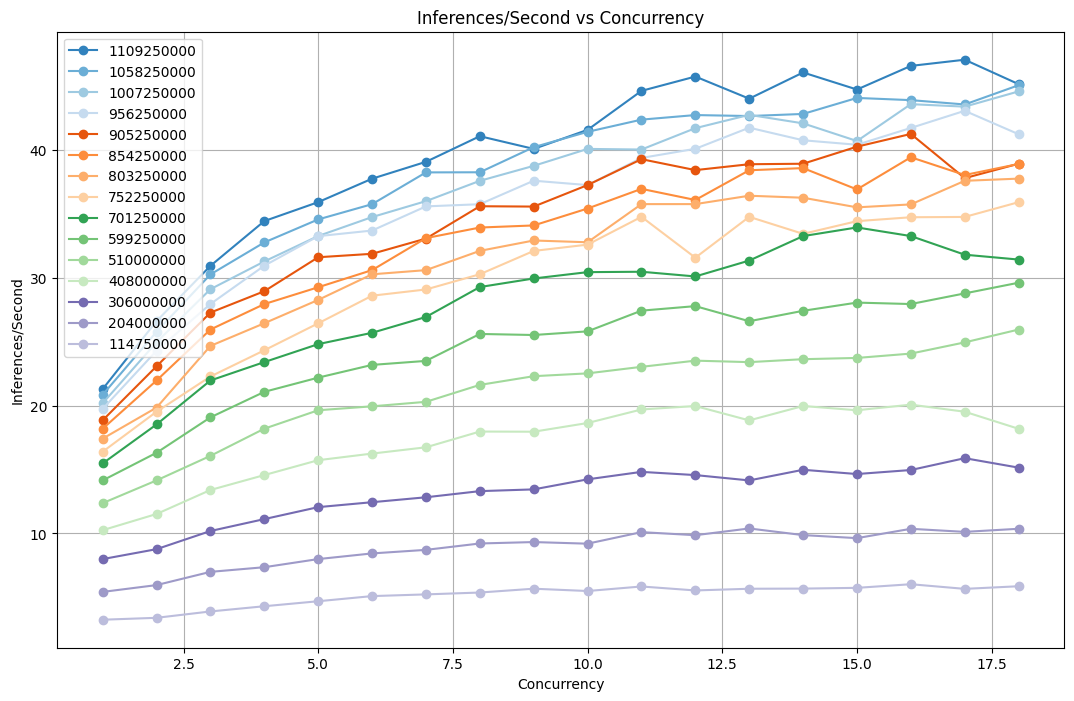

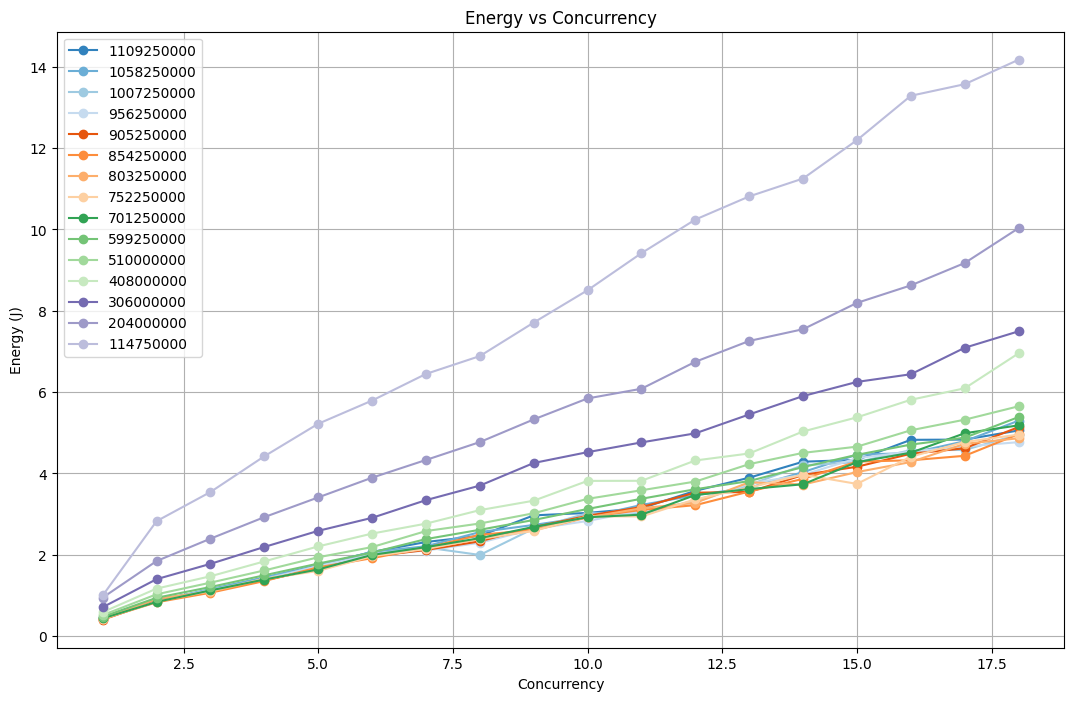

In [2]:
i.plot(f"{measurement_dir}/performance/freqs", 1, "Inferences/Second", "Inferences/Second vs Concurrency")
i.plot(f"{measurement_dir}/energy/freqs", 3, "Energy (J)", "Energy vs Concurrency")

### Latency

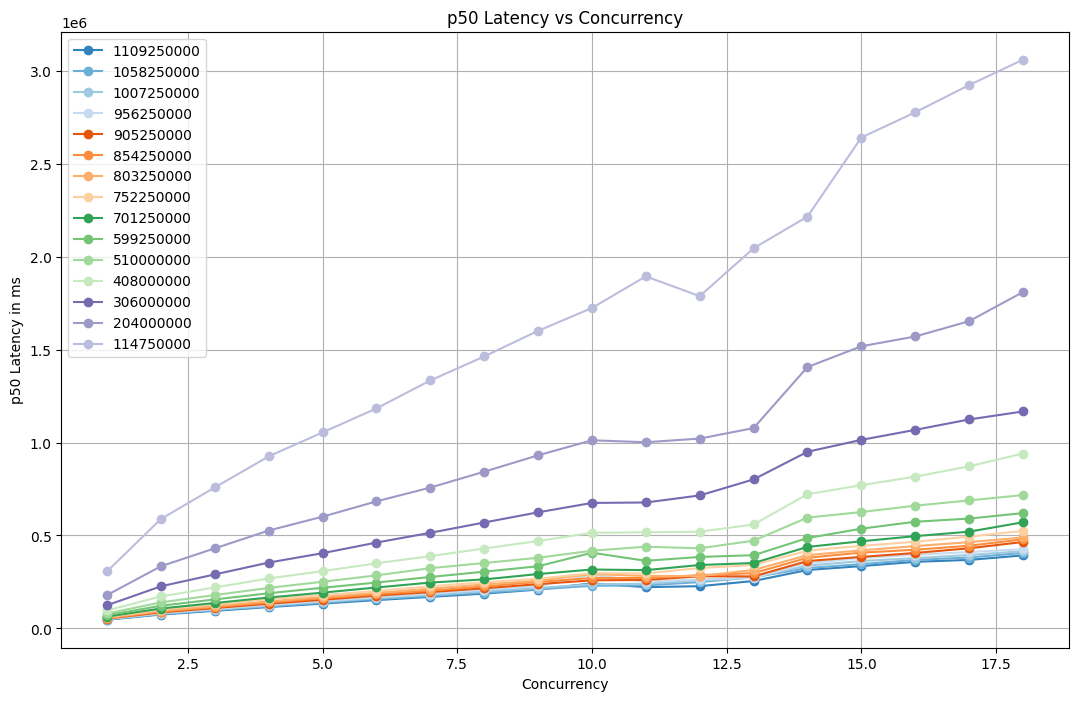

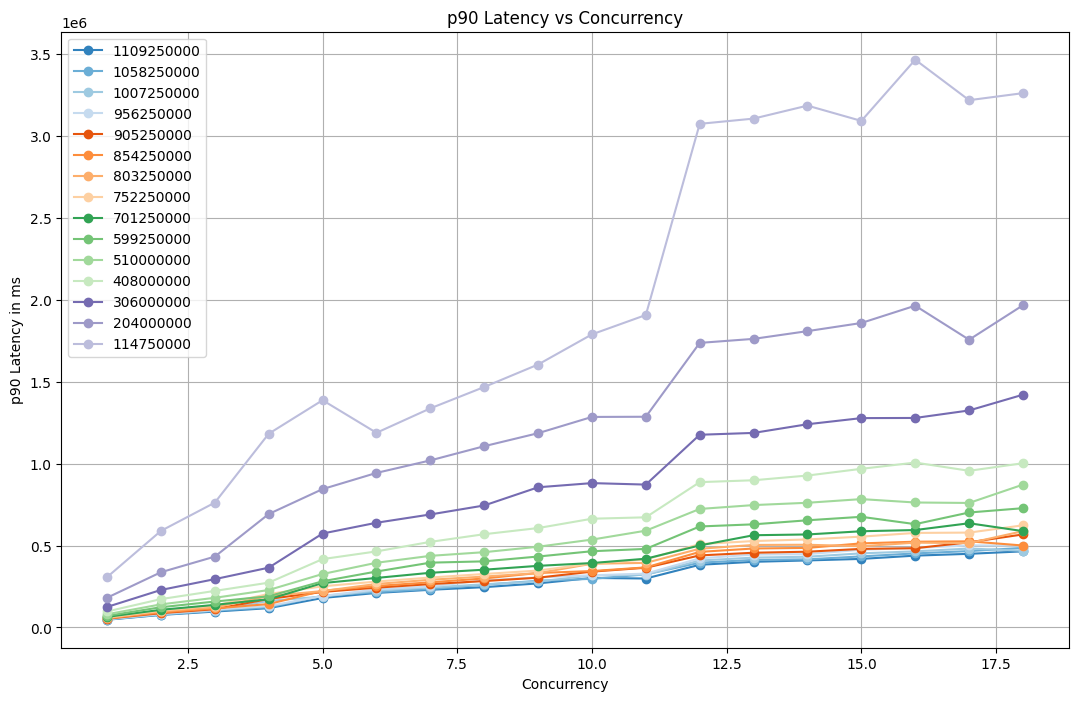

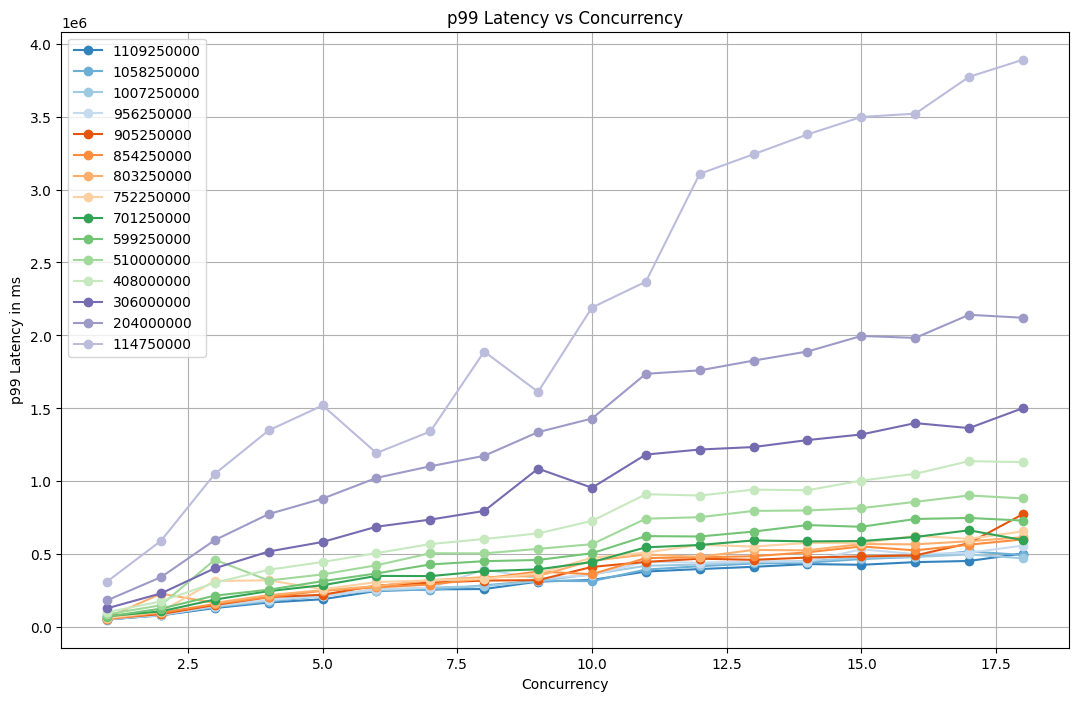

In [3]:
i.plot(f"{measurement_dir}/performance/freqs", 9, "p50 Latency in ms", "p50 Latency vs Concurrency")
i.plot(f"{measurement_dir}/performance/freqs", 10, "p90 Latency in ms", "p90 Latency vs Concurrency")
i.plot(f"{measurement_dir}/performance/freqs", 12, "p99 Latency in ms", "p99 Latency vs Concurrency")

## Plotting the results of the Power Mode Test


### Inferences per second

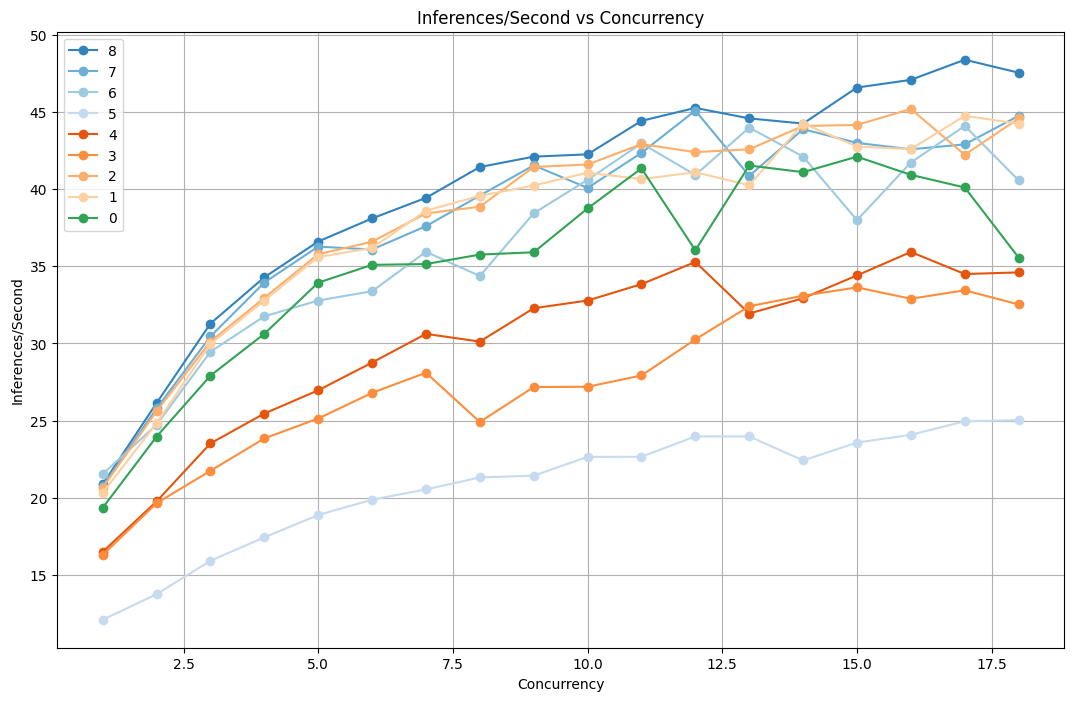

In [4]:
i.plot(f"{measurement_dir}/performance/modes", 1, "Inferences/Second", "Inferences/Second vs Concurrency")

### Latency

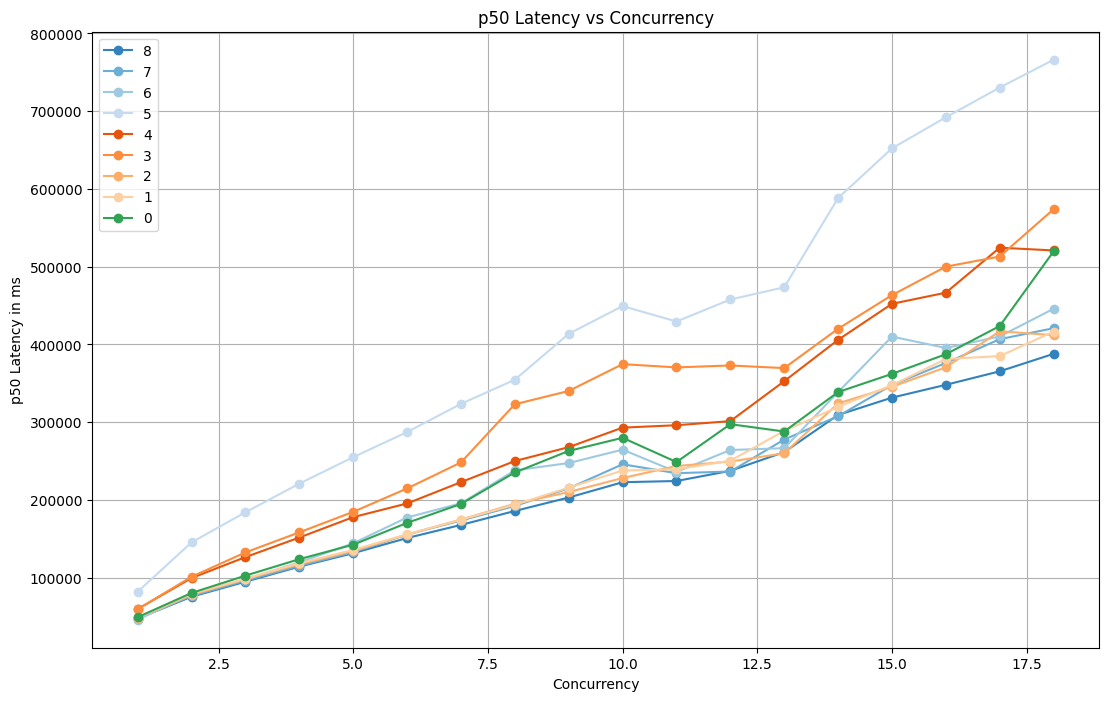

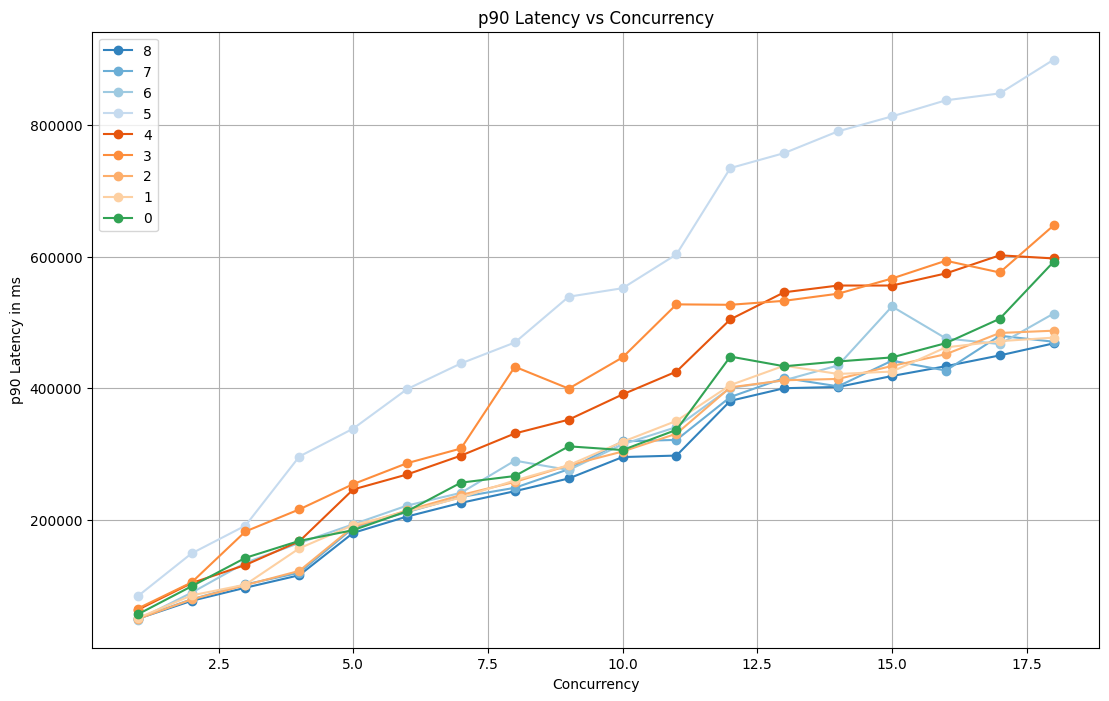

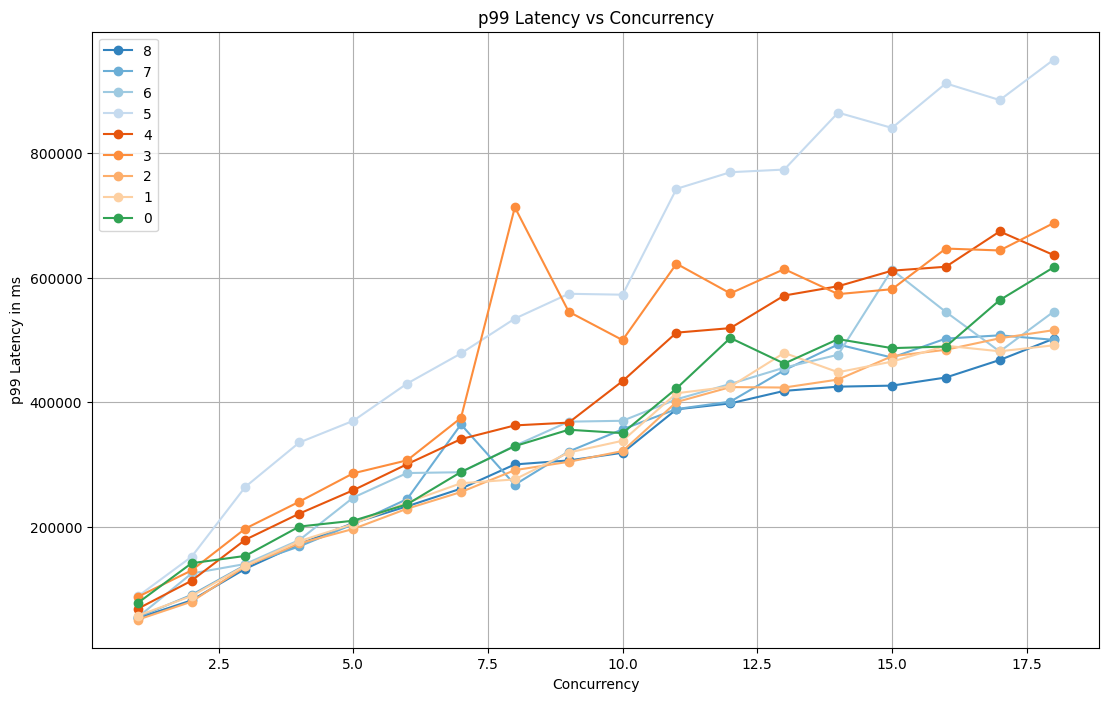

In [5]:
i.plot(f"{measurement_dir}/performance/modes", 9, "p50 Latency in ms", "p50 Latency vs Concurrency")
i.plot(f"{measurement_dir}/performance/modes", 10, "p90 Latency in ms", "p90 Latency vs Concurrency")
i.plot(f"{measurement_dir}/performance/modes", 12, "p99 Latency in ms", "p99 Latency vs Concurrency")